In [65]:
#Climate Action Data Analysis
#Objectives
#1.Load and preprocess the dataset
#2.Inspect the data for empty values, wrong data types, wrong formats, duplicates and outliers.
#3. Analyze the data to find patterns and relationships
#4. Visualize the data to understand trends and distributions.
#5. Evaluate the model performance using appropriate metrics
#6. Identify patterns and correlations
#7. Save the cleaned and processed data for future use

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('climate_action_data.csv')
df.info


<bound method DataFrame.info of     Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0    SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1    SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2    SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3    SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4    SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   
..        ...         ...              ...     ...            ...         ...   
908  SEN-1090  2025-04-01            18.37    7.03           21.0        47.1   
909  SEN-1201  2025-07-21            15.89     6.4           30.5        33.3   
910  SEN-1309  2025-11-06            28.96    5.04           20.5        47.6   
911  SEN-1339  2025-12-06            16.85    6.57           19.3        34.5   
912  SEN-1050  2025-02-20            77.87    4.73           18.6        46.2

In [67]:
df.dtypes
df.head(10)

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004
5,SEN-1005,2025-01-06,20.92,7.08,26.8,66.3,Beans,68.0,27.8,IMG-2005
6,SEN-1006,2025-01-07,14.07,7.77,19.1,51.9,Maize,64.3,10.5,IMG-2006
7,SEN-1007,2025-01-08,70.63,7.74,31.6,43.1,Lettuce,41.0,6.4,IMG-2007
8,SEN-1008,2025-01-09,52.08,6.08,22.0,89.3,Tomatoes,67.8,11.4,IMG-2008
9,SEN-1009,2025-01-10,59.57,4.9,27.2,57.2,Maize,35.2,18.2,IMG-2009


In [68]:
print('Number of duplicate rows:')
df.duplicated().sum()


Number of duplicate rows:


np.int64(111)

In [69]:
df = df.drop_duplicates()
print('Number of rows after removing duplicates:', df.shape)
df.duplicated().sum()

Number of rows after removing duplicates: (802, 10)


np.int64(0)

In [70]:
#handling missing values
print('Missing values per column:')
df.isnull().sum()


Missing values per column:


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [71]:
#for categorical columns
categorical_cols = ['Crop_Type']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])   #filling the null values with the mode of the column

print('Missing values after handling:')
print(df.isnull().sum())

Missing values after handling:
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


C:\Users\PC 12\AppData\Local\Temp\ipykernel_8220\1509540989.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mode()[0])   #filling the null values with the mode of the column


In [72]:
#wrong data
#convert 'Date' column to datetimeformat
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check empty values again
print("Missing values after all cleaning:")
print(df.isnull().sum())




Missing values after all cleaning:
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


C:\Users\PC 12\AppData\Local\Temp\ipykernel_8220\193128966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [83]:
#Descriptive statistics
df.describe()

,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%)
count,798,797.000000,797.000000,797.000000,797.000000
mean,2026-02-04 07:45:33.834586624,44.763726,6.248795,26.460602,60.037265
min,2025-01-01 00:00:00,10.350000,4.520000,18.000000,30.000000
25%,2025-07-19 06:00:00,26.930000,5.320000,22.300000,45.900000
50%,2026-02-03 12:00:00,45.410000,6.260000,26.600000,59.600000
75%,2026-08-23 18:00:00,62.670000,7.080000,30.600000,75.300000
max,2027-03-11 00:00:00,79.980000,8.000000,35.000000,89.900000
std,NaN,20.524828,1.024776,4.878540,17.470601


In [74]:
df.shape



(802, 10)

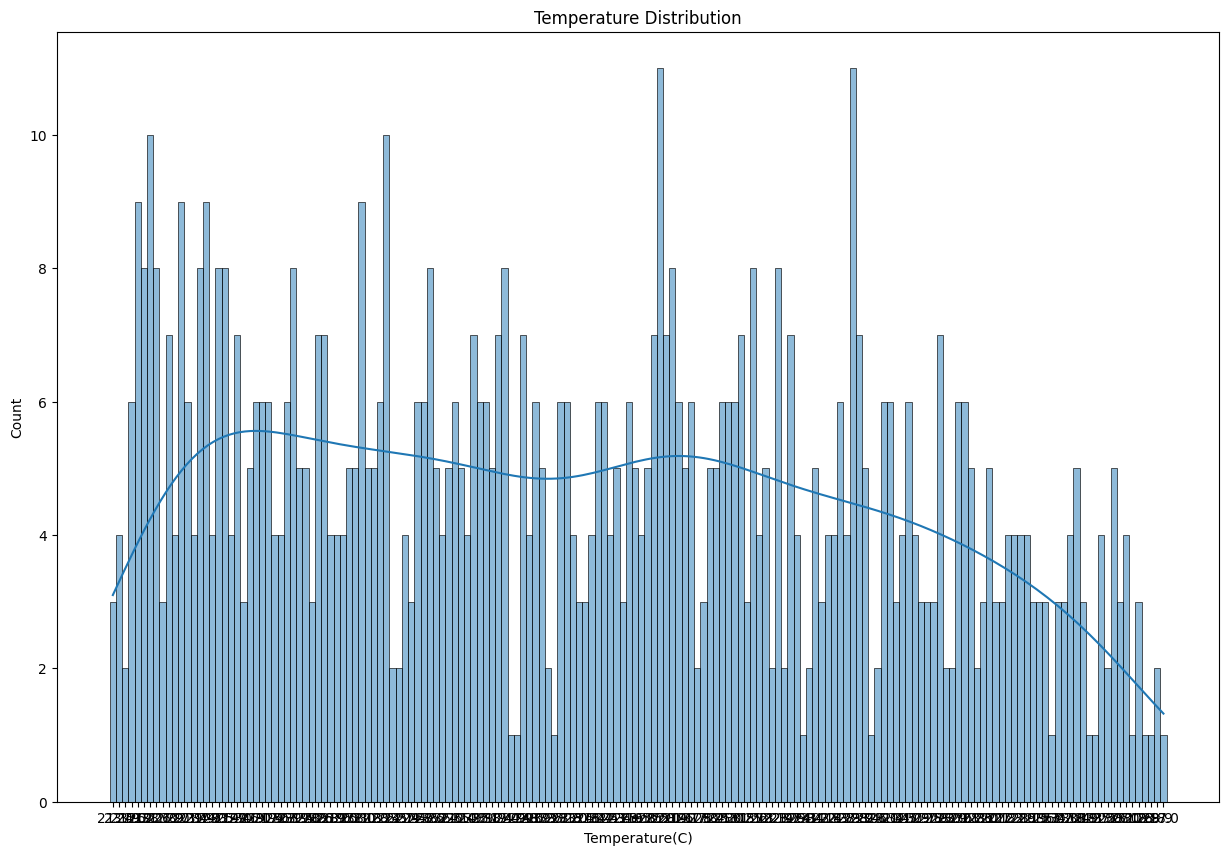

In [75]:
#histogram
#Histogram for 'Temperature'
plt.figure(figsize=(15,10))
sns.histplot(df['Temperature(C)'], bins=30,kde=True)
plt.title('Temperature Distribution')
plt.show()

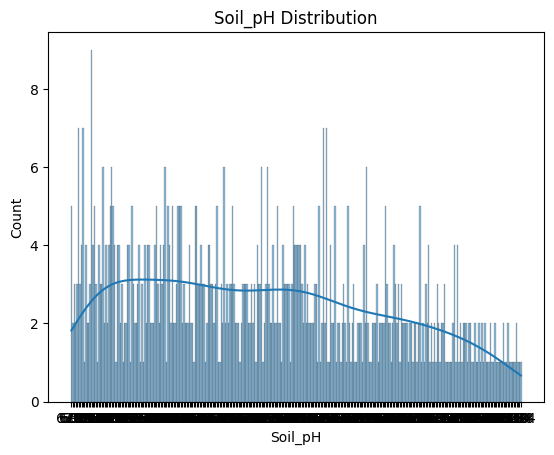

In [76]:
#histogram for soil_pH
sns.histplot(df['Soil_pH'], bins=30,kde=True)
plt.title('Soil_pH Distribution')
plt.show()

In [77]:
#convert necessary data types
df['Soil_Moisture(%)'] = pd.to_numeric(df['Soil_Moisture(%)'], errors='coerce')
df['Soil_pH'] = pd.to_numeric(df['Soil_pH'], errors='coerce')
df['Temperature(C)'] = pd.to_numeric(df['Temperature(C)'], errors='coerce')
df['Humidity(%)'] = pd.to_numeric(df['Humidity(%)'], errors='coerce')

C:\Users\PC 12\AppData\Local\Temp\ipykernel_8220\2096139556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Soil_Moisture(%)'] = pd.to_numeric(df['Soil_Moisture(%)'], errors='coerce')
C:\Users\PC 12\AppData\Local\Temp\ipykernel_8220\2096139556.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Soil_pH'] = pd.to_numeric(df['Soil_pH'], errors='coerce')
C:\Users\PC 12\AppData\Local\Temp\ipykernel_8220\2096139556.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

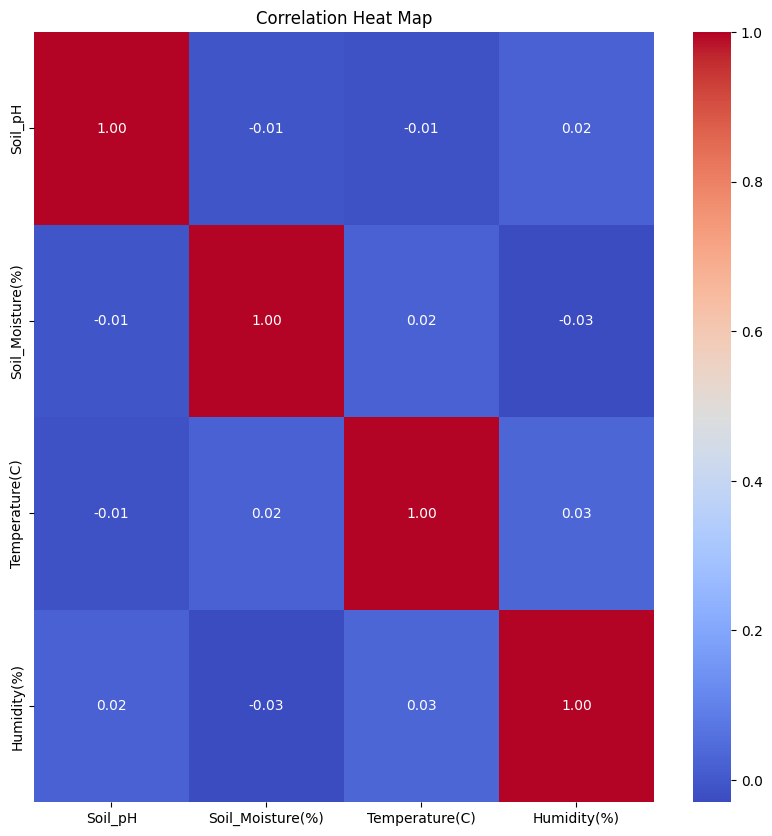

In [80]:
#Correlation heat map
corr_matrix = df[['Soil_pH','Soil_Moisture(%)','Temperature(C)','Humidity(%)']].corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heat Map')
plt.show()

In [82]:
#crop_type with the highest average soil moisture

df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)


Crop_Type
Wheat       47.368857
Maize       44.952078
Beans       44.389139
Tomatoes    43.809760
Lettuce     42.970200
Name: Soil_Moisture(%), dtype: float64

In [85]:
#appropriate irrigation adjustments for crops experiencing average temperature above 30C
df['Irrigation_Recommended(mm)'] = pd.to_numeric(df['Irrigation_Recommended(mm)'], errors='coerce')

df[df['Temperature(C)'] > 30].groupby('Crop_Type')['Irrigation_Recommended(mm)'].mean()

C:\Users\PC 12\AppData\Local\Temp\ipykernel_8220\2507773275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Irrigation_Recommended(mm)'] = pd.to_numeric(df['Irrigation_Recommended(mm)'], errors='coerce')


Crop_Type
Beans       17.857692
Lettuce     16.297297
Maize       16.625455
Tomatoes    18.919565
Wheat       18.645946
Name: Irrigation_Recommended(mm), dtype: float64

In [ ]:
#key insights
#1.The dataset has been cleaned and preprocessed with missing values handled
#2.The correlation analysis shows each environmental factor appears to vary independently of the others
#3.The cleaned and processed data is ready for future analysis or modelling.
#4.The data is in a suitable format for analysis and modelling.

#Recommendations
# 1.Model Improvement:Explore more advanced machine learning models or deep learning techniques to improve Irrigation and Fertilizer Recommendations 
# 2. Data Enrichment: Collect more data on weather patterns and soil types
# 3. Feature Engineering: Extract more relevant features from the existing data to improve model performance.
# 4. Time Series Analysis: Implement time series analysis techniques to capture trends and seasonality in the data.
# 5. Model Deployment: Deploy the model in a production-ready environment for real-time predictions.



In [86]:
#exporting the cleaned data
df.to_csv('cleaned_precision_agriculture_data.csv',index=False)
